# **Installing Fuzzy**

In [ ]:
!pip install scikit-fuzzy


# **Fuzzy Reasoning Reproduced Results**

Brake output: 10.00

Membership functions and defuzzification:


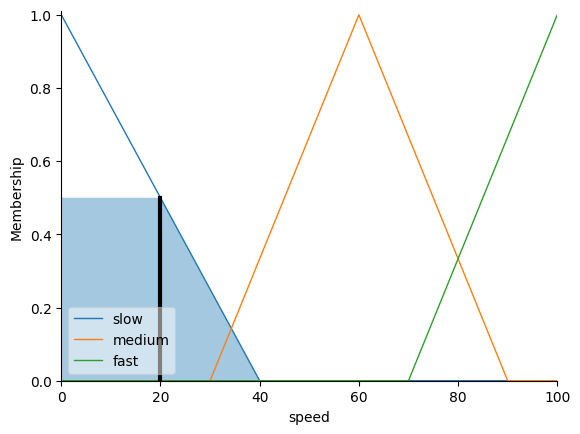

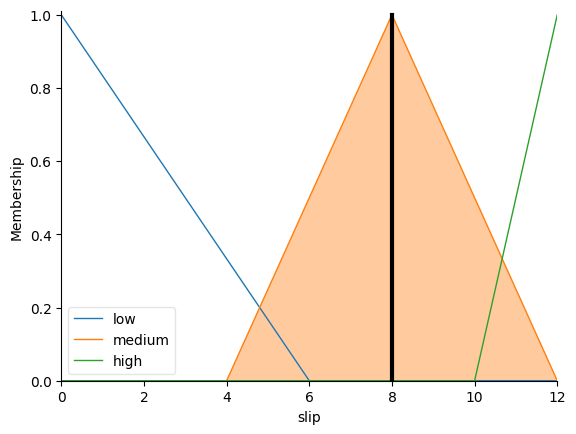

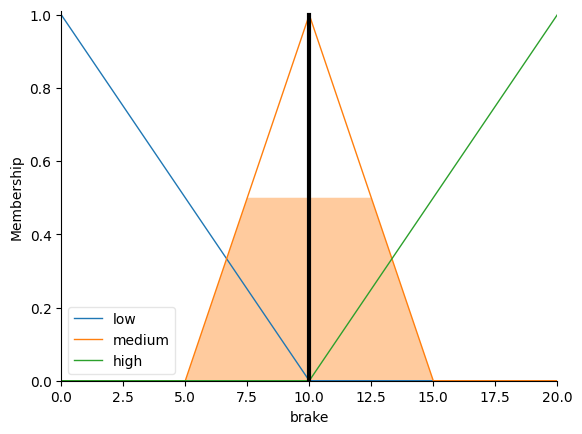

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy input variables (Antecedents)
speed_antecedent = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')
slip_antecedent = ctrl.Antecedent(np.arange(0, 13, 1), 'slip')

# Define fuzzy output variable (Consequent)
brake_consequent = ctrl.Consequent(np.arange(0, 21, 1), 'brake') # Brake output from 0 to 20

# Define membership functions for speed_antecedent
speed_antecedent['slow'] = fuzz.trimf(speed_antecedent.universe, [0, 0, 40])
speed_antecedent['medium'] = fuzz.trimf(speed_antecedent.universe, [30, 60, 90])
speed_antecedent['fast'] = fuzz.trimf(speed_antecedent.universe, [70, 100, 100])

# Define membership functions for slip_antecedent
slip_antecedent['low'] = fuzz.trimf(slip_antecedent.universe, [0, 0, 6])
slip_antecedent['medium'] = fuzz.trimf(slip_antecedent.universe, [4, 8, 12])
slip_antecedent['high'] = fuzz.trimf(slip_antecedent.universe, [10, 12, 12])

# Define membership functions for brake_consequent output
brake_consequent['low'] = fuzz.trimf(brake_consequent.universe, [0, 0, 10])
brake_consequent['medium'] = fuzz.trimf(brake_consequent.universe, [5, 10, 15])
brake_consequent['high'] = fuzz.trimf(brake_consequent.universe, [10, 20, 20])

# Define fuzzy rules
rule1 = ctrl.Rule(speed_antecedent['slow'] & slip_antecedent['low'], brake_consequent['low'])
rule2 = ctrl.Rule(speed_antecedent['medium'] & slip_antecedent['medium'], brake_consequent['medium'])
rule3 = ctrl.Rule(speed_antecedent['fast'] | slip_antecedent['high'], brake_consequent['high'])
rule4 = ctrl.Rule(speed_antecedent['slow'] & slip_antecedent['medium'], brake_consequent['medium'])
rule5 = ctrl.Rule(speed_antecedent['medium'] & slip_antecedent['high'], brake_consequent['high'])
rule6 = ctrl.Rule(speed_antecedent['fast'] & slip_antecedent['low'], brake_consequent['medium'])

# Create the Control System
braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

# Create the ControlSystemSimulation object
braking_sim = ctrl.ControlSystemSimulation(braking_ctrl)

# Define the wrapper function abs_brake_system
# This function is designed to accept 'speed' and 'slip' as keyword arguments,
# matching the requested call signature and fixing the TypeError.
def abs_brake_system(speed, slip):
    # Set the input values for the simulation using the function arguments
    braking_sim.input['speed'] = speed
    braking_sim.input['slip'] = slip

    # Compute the fuzzy result
    braking_sim.compute()

    # Print the defuzzified output
    print(f"Brake output: {braking_sim.output['brake']:.2f}")

    # Visualize the membership functions and the defuzzification process
    print("\nMembership functions and defuzzification:")
    speed_antecedent.view(sim=braking_sim)
    slip_antecedent.view(sim=braking_sim)
    brake_consequent.view(sim=braking_sim)

# Now, call the function as requested in the subtask
abs_brake_system(speed=20, slip=8)

# **Re-execute Restaurant Tipping System**

Tip output: 10.84

Membership functions and defuzzification:


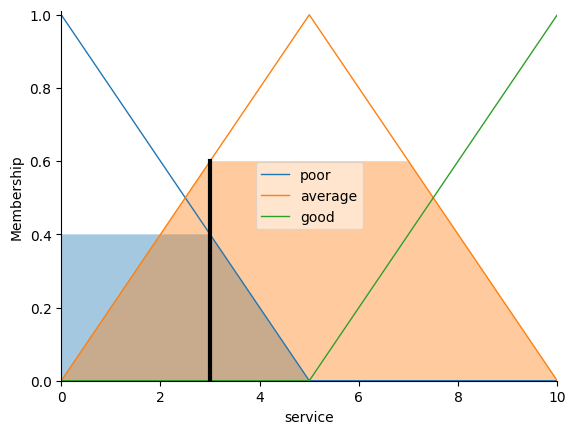

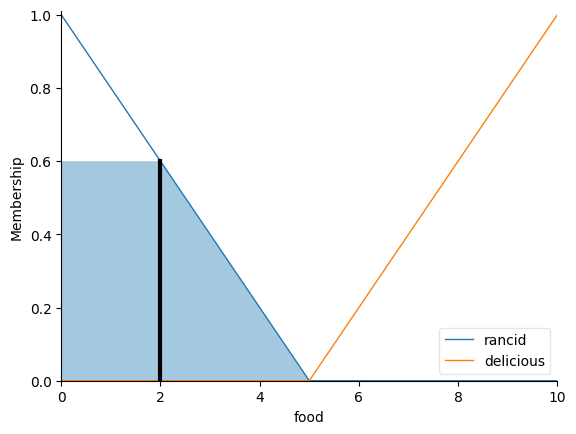

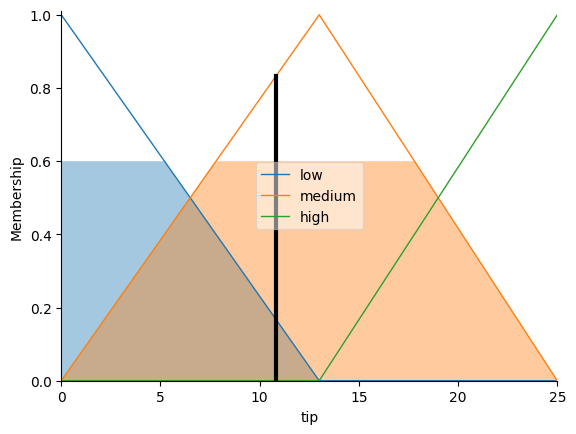

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Define fuzzy input variables (Antecedents)
service_antecedent = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
food_antecedent = ctrl.Antecedent(np.arange(0, 11, 1), 'food')

# 2. Define fuzzy output variable (Consequent)
tip_consequent = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# 3. Create membership functions
# Service quality
service_antecedent['poor'] = fuzz.trimf(service_antecedent.universe, [0, 0, 5])
service_antecedent['average'] = fuzz.trimf(service_antecedent.universe, [0, 5, 10])
service_antecedent['good'] = fuzz.trimf(service_antecedent.universe, [5, 10, 10])

# Food quality
food_antecedent['rancid'] = fuzz.trimf(food_antecedent.universe, [0, 0, 5])
food_antecedent['delicious'] = fuzz.trimf(food_antecedent.universe, [5, 10, 10])

# Tip amount
tip_consequent['low'] = fuzz.trimf(tip_consequent.universe, [0, 0, 13])
tip_consequent['medium'] = fuzz.trimf(tip_consequent.universe, [0, 13, 25])
tip_consequent['high'] = fuzz.trimf(tip_consequent.universe, [13, 25, 25])

# 4. Define fuzzy rules
rule1 = ctrl.Rule(service_antecedent['poor'] | food_antecedent['rancid'], tip_consequent['low'])
rule2 = ctrl.Rule(service_antecedent['average'], tip_consequent['medium'])
rule3 = ctrl.Rule(service_antecedent['good'] | food_antecedent['delicious'], tip_consequent['high'])

# 5. Create the Control System
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# 5. Create the ControlSystemSimulation object
tipping_sim = ctrl.ControlSystemSimulation(tipping_ctrl)

# 6. Define a Python function named restaurant_tipping
def restaurant_tipping(service, food):
    # 7. Set the input values for the simulation
    tipping_sim.input['service'] = service
    tipping_sim.input['food'] = food

    # Compute the fuzzy result
    tipping_sim.compute()

    # Print the defuzzified output
    print(f"Tip output: {tipping_sim.output['tip']:.2f}")

    # 8. Visualize the membership functions and the defuzzification process
    print("\nMembership functions and defuzzification:")
    service_antecedent.view(sim=tipping_sim)
    food_antecedent.view(sim=tipping_sim)
    tip_consequent.view(sim=tipping_sim)

# 9. Call the restaurant_tipping function as requested
restaurant_tipping(service=3, food=2)